<a href="https://colab.research.google.com/github/nuraishasb/sentiment-analysis/blob/main/Python_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#essential libraries!

#Linear algebra
import numpy as np
#EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#NLTK libraries
import nltk
nltk.download('all')

#Stopwords
from nltk.corpus import stopwords

#Stemmer & Lemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

#Wordcloud
from wordcloud import WordCloud,STOPWORDS

#Tokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

#RE
import re,string,unicodedata

#Bag of words
from textblob import TextBlob
from textblob import Word

#Feature Extraction
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

#ML models
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

#Metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Web Scrapping tool
from bs4 import BeautifulSoup

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

### **importing & inspecting data**

In [12]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#import data
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/IMDB.csv')

Mounted at /content/drive


In [13]:
#inspect data
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
#summary of the dataset
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [15]:
#counting sentiments
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### **data preprocessing**

In [16]:
#initialize the tokenizer
tokenizer = ToktokTokenizer()
#setting English stopwords
stopword = nltk.corpus.stopwords.words('english')

In [17]:
# Example text to tokenize
text = "This is an example sentence for tokenization."

# Tokenize the text
tokens = tokenizer.tokenize(text)

# Print the tokens
print(tokens)

['This', 'is', 'an', 'example', 'sentence', 'for', 'tokenization', '.']


In [18]:
#removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text\

#removing the noisy text
def denoise_text(text):
  text = strip_html(text)
  text = remove_between_square_brackets(text)
  text = remove_special_characters(text)
  return text

#set stopwords to english
stop = set(stopwords.words('english'))
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword]
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

In [19]:
from nltk import pos_tag, word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(tag):
    if tag.startswith('N'):
        return 'n'  # Noun
    elif tag.startswith('V'):
        return 'v'  # Verb
    elif tag.startswith('R'):
        return 'r'  # Adverb
    elif tag.startswith('J'):
        return 'a'  # Adjective
    else:
        return 'n'  # Default to noun for unknown or uncategorized words

#define lemmatizer
def simple_lemmatize(text):
  lemmatizer = WordNetLemmatizer()
  tokens = word_tokenize(text)
  pos_tags = pos_tag(tokens)
  lemmatized_tokens = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]
  lemmatized_text = ' '.join(lemmatized_tokens)
  return lemmatized_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [20]:
#apply function on review column
df['review'] = df['review'].apply(denoise_text)
df['review'] = df['review'].apply(simple_lemmatize)
df['review'] = df['review'].apply(remove_stopwords)
df['review'] = df['review'].apply(strip_html)

In [21]:
#new var for the normalized df
data = df
data

,review,sentiment
0,One reviewer mention watch 1 Oz episode youll ...,positive
1,wonderful little production filming technique ...,positive
2,think wonderful way spend time hot summer week...,positive
3,Basically theres family little boy Jake think ...,negative
4,Petter Matteis Love Time Money visually stunni...,positive
...,...,...
49995,think movie right good job wasnt creative orig...,positive
49996,Bad plot bad dialogue bad act idiotic direct a...,negative
49997,Catholic taught parochial elementary school nu...,negative
49998,Im go disagree previous comment side Maltin on...,negative


In [22]:
data.shape

(50000, 2)

In [23]:
data['review'].head()

0    One reviewer mention watch 1 Oz episode youll ...
1    wonderful little production filming technique ...
2    think wonderful way spend time hot summer week...
3    Basically theres family little boy Jake think ...
4    Petter Matteis Love Time Money visually stunni...
Name: review, dtype: object

##feature extraction

### Method 1: Bag of words

The "Bag of Words" (BoW) model is a common and simple representation used in natural language processing (NLP) and information retrieval. It's a way of converting text data into numerical vectors that can be used by machine learning algorithms.


In [24]:
#fitting our data into countvectorizer
vect = CountVectorizer(ngram_range = (1,3)).fit(data['review'])

In [25]:
#getting the feature names from the vectorised features
feature_names = vect.get_feature_names_out()
feature_names

array(['00', '00 act', '00 act character', ...,
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz 8ooops',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz 8ooops sorry'], dtype=object)

In [26]:
#extract feature
X_cv = data['review']
#transforming feature data
X_cv = vect.transform(X_cv)

X_cv.shape

(50000, 8511140)

In [27]:
#extract target
Y_cv = data['sentiment']

###Method 2: TF-IDF

Term Frequency (TF):

The TF component measures how often a term appears in a document. It's a raw count of the number of times the term occurs within the document.
TF is calculated for each term within each document.

Inverse Document Frequency (IDF):

The IDF component evaluates how important a term is across the entire corpus. It's a measure of how unique or rare a term is.


Terms that appear frequently in many documents have a lower IDF, while terms that appear in a smaller subset of documents have a higher IDF.


In [29]:
tfidf = TfidfVectorizer(ngram_range = (1,3)).fit(data['review'])
tfidf.get_feature_names_out()

array(['00', '00 act', '00 act character', ...,
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz 8ooops',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz 8ooops sorry'], dtype=object)

In [30]:
#extract feature
X_tf = tfidf.fit_transform(data['review'])

print(X_tf.shape)

(50000, 8511140)


In [31]:
#extract target
Y_tf = data['sentiment']

##ML modelling

### Model 1: Logistic Regression

In [32]:
#training the model
lr = LogisticRegression()

## BAG OF WORDS
#split data
x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, Y_cv, test_size=0.2, random_state=42)

#fitting the model for Bag of words
lr_bow = lr.fit(x_train_cv,y_train_cv)
print(lr_bow)

#predicting the model for bag of words
lr_bow_predict = lr.predict(x_test_cv)
print(lr_bow_predict)

LogisticRegression()
['negative' 'positive' 'negative' ... 'positive' 'negative' 'positive']


In [33]:
## TFIDF
#split data
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, Y_tf, test_size=0.2, random_state=42)

#fitting the model for tfidf features
lr_tfidf = lr.fit(x_train_tf,y_train_tf)
print(lr_tfidf)

#predicting the model for tfidf features
lr_tfidf_predict = lr.predict(x_test_tf)
print(lr_tfidf_predict)

LogisticRegression()
['negative' 'positive' 'negative' ... 'positive' 'negative' 'positive']


In [34]:
#accuracy score for bag of words
lr_bow_score = accuracy_score(y_test_cv,lr_bow_predict)
print('lr_bow_score : {:.2f}%'.format(lr_bow_score*100))

#accuracy score for tfidf features
lr_tfidf_score = accuracy_score(y_test_tf,lr_tfidf_predict)
print('lr_tfidf_score : {:.2f}%'.format(lr_tfidf_score*100))

lr_bow_score : 89.50%
lr_tfidf_score : 87.69%


In [35]:
#classification report for bag of words
lr_bow_report = classification_report(y_test_cv,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#classification report for tfidf features
lr_tfidf_report = classification_report(y_test_tf,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.90      0.88      0.89      4961
    Negative       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000

              precision    recall  f1-score   support

    Positive       0.89      0.85      0.87      4961
    Negative       0.86      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



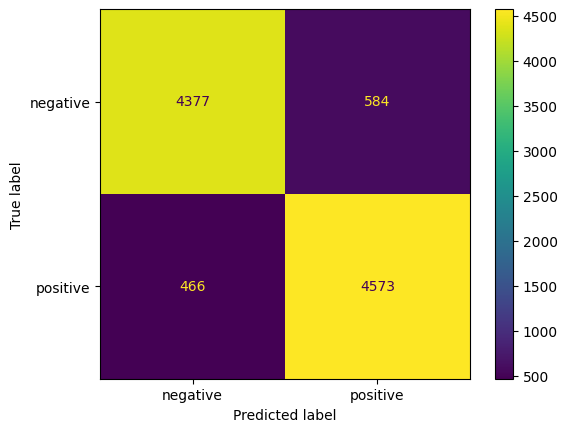

In [36]:
#confusion matrix for bag of words
cm_cv = confusion_matrix(y_test_cv, lr_bow_predict, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_cv, display_labels = lr.classes_)
disp.plot()

High True Positive (4573) and True Negative (4377) counts: Indicate that the model performs well in correctly identifying both positive and negative reviews.


\
False Positives (584) and False Negatives (466): These values are relatively low but indicate that the model still makes some mistakes, misclassifying some negative reviews as positive and some positive reviews as negative.


\
With an accuracy of 89.5%, the model is quite effective in classifying movie reviews correctly. It suggest a good balance between correctly predicting positive reviews and identifying all actual positive reviews.

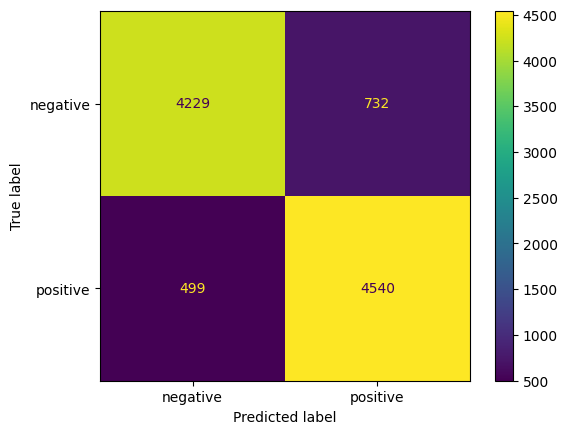

In [37]:
#confusion matrix for tfidf
cm_tf = confusion_matrix(y_test_tf, lr_tfidf_predict, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tf, display_labels = lr.classes_)
disp.plot()

### Model 2: Multinomial Naive Bayes (MNB)

In [39]:
#training the model
mnb = MultinomialNB()

## BAG OF WORDS
#fitting the svm for bag of words
mnb_bow = mnb.fit(x_train_cv,y_train_cv)

#predicting the model for bag of words
mnb_bow_predict = mnb.predict(x_test_cv)

In [40]:
## TFIDF
#fitting the svm for tfidf features
mnb_tfidf = mnb.fit(x_train_tf,y_train_tf)

#predicting the model for tfidf features
mnb_tfidf_predict = mnb.predict(x_test_tf)

In [41]:
#accuracy score for bag of words
mnb_bow_score = accuracy_score(y_test_cv,mnb_bow_predict)
print('mnb_bow_score : {:.2f}%'.format(mnb_bow_score*100))

#accuracy score for tfidf features
mnb_tfidf_score = accuracy_score(y_test_tf,mnb_tfidf_predict)
print('mnb_tfidf_score : {:.2f}%'.format(mnb_tfidf_score*100))

mnb_bow_score : 88.42%
mnb_tfidf_score : 88.69%


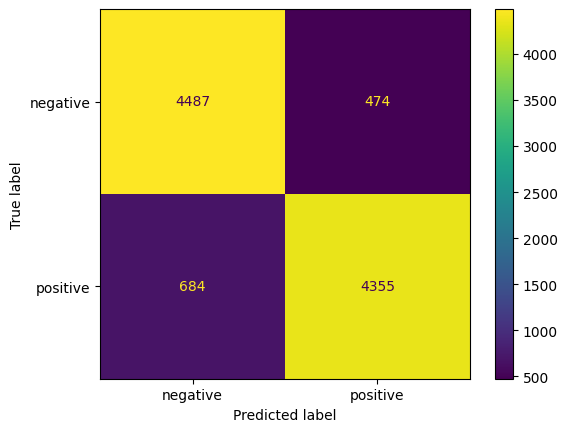

In [42]:
#confusion matrix for bog
cm_cv_mnb = confusion_matrix(y_test_cv, mnb_bow_predict, labels=mnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_cv_mnb, display_labels = mnb.classes_)
disp.plot()

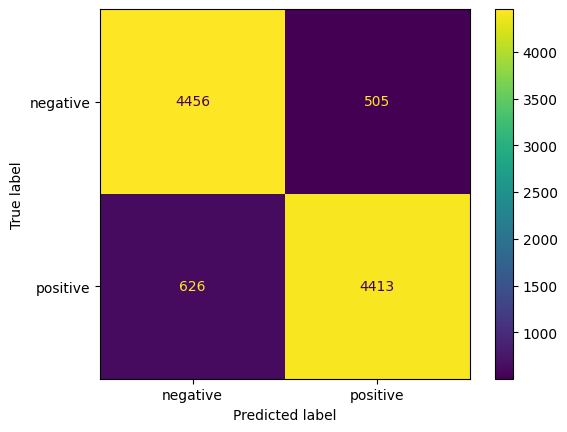

In [43]:
#confusion matrix for tfidf
cm_tf_mnb = confusion_matrix(y_test_tf, mnb_tfidf_predict, labels=mnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tf_mnb, display_labels = mnb.classes_)
disp.plot()